<a href="https://colab.research.google.com/github/lakshaygola/TensorFlow-And-DeepLearning/blob/main/ann_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('ann-tensorflow')
jovian.set_colab_id('1HdjXOSpogLdroRMM0TORsTHhdKvVdPf6')

     |████████████████████████████████| 71kB 6.3MB/s 


# ann-tensorflow

Use the "Run" button to execute the code.

In [2]:
!pip install opendatasets --upgrade --quiet
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="ann-tensorflow")

In [5]:
porject_name= 'ann-tensorflow'

In [28]:
import os 
import numpy as np
import pandas as pd
import opendatasets as od
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, ReLU
from keras.layers import Dropout

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Downloading the dataset
dataset_url= 'https://www.kaggle.com/shrutimechlearn/churn-modelling?select=Churn_Modelling.csv'

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: lakshaygola
Your Kaggle Key: ··········


100%|██████████| 262k/262k [00:00<00:00, 53.7MB/s]

In [8]:
# Making a directory to store the dataset
data_dir= './churn-modelling'

print(os.listdir(data_dir))

['Churn_Modelling.csv']


In [9]:
# Reading the dataset using pandas
data= pd.read_csv('/content/churn-modelling/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Separating the independent and dependent dataset
x= data.iloc[:, 3:-1] 
y= data.iloc[:, -1:]

In [11]:
# Creating dummies variable of the categorical variable
geography= pd.get_dummies(x['Geography'], drop_first= True)
gender= pd.get_dummies(x['Gender'], drop_first= True)

In [12]:
# Concating the dummies variable in the data set
X= pd.concat([x, geography, gender], axis= 1)

# Droping the categorical columns of the dummies variable
x= X.drop(['Geography', 'Gender'], axis= 1)

In [13]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
jovian.commit(porject= project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/lakshaygola/ann-tensorflow


'https://jovian.ai/lakshaygola/ann-tensorflow'

In [14]:
# Now spliting the dataset into training data and test data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size= 0.2, random_state= 10)

In [15]:
xtrain

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7496,824,49,8,133231.48,1,1,1,67885.37,1,0,1
7694,676,64,4,116954.32,1,1,1,91149.48,0,1,0
9248,629,34,6,0.00,2,1,0,190347.72,0,1,1
2470,689,31,3,139799.63,1,0,1,120663.57,0,1,0
4392,787,51,0,58137.08,1,0,1,142538.31,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9372,677,30,1,78133.15,1,0,1,174225.88,0,0,1
7291,599,33,4,51690.89,1,1,0,111622.76,0,1,1
1344,460,40,6,119507.58,2,1,0,91560.63,1,0,0
7293,709,34,2,111669.68,1,1,0,57029.66,0,0,0


In [16]:
# Appling the feature sacling on the input data xtrain and xtest
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
xtrain= scaler.fit_transform(xtrain)
xtest= scaler.fit_transform(xtest)

In [17]:
xtrain

array([[ 1.78974378,  0.94394225,  1.04271518, ...,  1.73436329,
        -0.57388614,  0.91255717],
       [ 0.26040483,  2.35932486, -0.35053238, ..., -0.57658047,
         1.74250594, -1.09582175],
       [-0.22526362, -0.47144036,  0.3460914 , ..., -0.57658047,
         1.74250594,  0.91255717],
       ...,
       [-1.97160337,  0.09471269,  0.3460914 , ...,  1.73436329,
        -0.57388614, -1.09582175],
       [ 0.60140608, -0.47144036, -1.04715616, ..., -0.57658047,
        -0.57388614, -1.09582175],
       [ 0.21907135,  0.09471269,  1.73933896, ...,  1.73436329,
        -0.57388614,  0.91255717]])

In [40]:
# Making artifical nerual network ANN
classifer= Sequential()

classifer.add(Dense(units= 8, kernel_initializer= 'he_uniform', activation= 'relu', input_dim= 11))
classifer.add(Dropout(0.4))

classifer.add(Dense(units= 6, kernel_initializer= 'he_uniform', activation= 'relu'))
classifer.add(Dropout(0.3))

classifer.add(Dense(units= 1, kernel_initializer= 'glorot_uniform', activation= 'sigmoid'))

classifer.compile(optimizer= 'Adamax', loss= 'binary_crossentropy', metrics= ['accuracy'])

model_history= classifer.fit(xtrain, ytrain, validation_split= 0.35, batch_size= 128, epochs= 60)

print(model_history.history.keys())

Epoch 1/60
41/41 [==============================] - 1s 6ms/step - loss: 0.6617 - accuracy: 0.7061 - val_loss: 0.5471 - val_accuracy: 0.7686
Epoch 2/60
41/41 [==============================] - 0s 3ms/step - loss: 0.6290 - accuracy: 0.7271 - val_loss: 0.5376 - val_accuracy: 0.7839
Epoch 3/60
41/41 [==============================] - 0s 3ms/step - loss: 0.6044 - accuracy: 0.7407 - val_loss: 0.5299 - val_accuracy: 0.7961
Epoch 4/60
41/41 [==============================] - 0s 2ms/step - loss: 0.6161 - accuracy: 0.7490 - val_loss: 0.5240 - val_accuracy: 0.8000
Epoch 5/60
41/41 [==============================] - 0s 3ms/step - loss: 0.5958 - accuracy: 0.7519 - val_loss: 0.5187 - val_accuracy: 0.8000
Epoch 6/60
41/41 [==============================] - 0s 3ms/step - loss: 0.5905 - accuracy: 0.7555 - val_loss: 0.5142 - val_accuracy: 0.7993
Epoch 7/60
41/41 [==============================] - 0s 3ms/step - loss: 0.5870 - accuracy: 0.7636 - val_loss: 0.5101 - val_accuracy: 0.7996
Epoch 8/60
41/41 [==

In [35]:
# Taking the prediction of the model using test data
ypred= classifer.predict(xtest)
ypred= ypred > 0.5 
ypred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

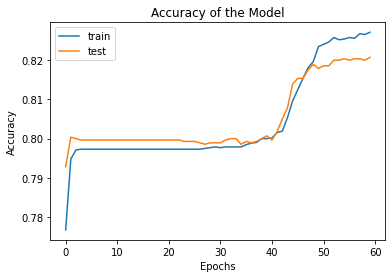

In [36]:
# Making the plots to see the progress of our model (For Accuracy)
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Accuracy of the Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

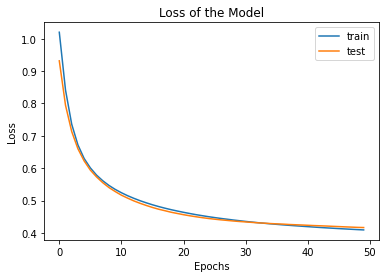

In [33]:
# Making the plots to track the progress of the model (For loss)
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss of the Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'])
plt.show()

In [38]:
# Getting the score of the model for the test dataset
from sklearn.metrics import accuracy_score
test_accuracy= accuracy_score(ypred, ytest)
test_accuracy

0.8065